In [1]:
# ! ls -al /data/s3-cache/foba_events/hk/stocks_dremio/

In [2]:
# !pip install --upgrade --force-reinstall --no-deps git+ssh://git@gitlab.trading.imc.intra/apac-analysis/underlying-analysis

In [1]:
from imc_util.contrib.fullorderbook.new_enrichers.persist import s3_pull
from imc_util.contrib.fullorderbook.s3_wrappers.hk_stocks import get_days_ago
from imc_util.contrib.hk.hk_stocks_foba_util import enrich_hk_stocks_foba_dataframe_general_fields, enrich_hk_stocks_foba_dataframe_competitors
from imc_util.core.pandas_util import DataFrameReport
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

/opt/conda/envs/hk-hedging-shared/lib/python3.8/site-packages/imc_util/core/_pivot.py:8: FutureWarning: pandas.core.index is deprecated and will be removed in a future version. The public classes are available in the top-level namespace.
  from pandas.core.index import MultiIndex, Index


In [2]:
import datetime
from IPython.display import HTML
import IPython.display as iDisp
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

pd.options.display.max_columns = 1000
pd.options.display.max_rows = 1000
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.float_format', lambda x: '{:15,.12g}'.format(float('{:.3}'.format(float(x)))))

plt.rcParams['figure.figsize'] = (25, 5)

style = """
<style>
.container { width:90% !important; }
</style>
"""
HTML(style)

In [3]:
days_ago = get_days_ago()

In [4]:
days_ago = 0

In [5]:
num_days = 1

In [6]:
raw_data = s3_pull(desk='hk', strategies=['stocks_dremio'], days_ago=days_ago, num_days=num_days, max_tries=3)

2024-01-10 10:08:42,360 - imc_util.contrib.fullorderbook.new_enrichers.persist - DEBUG - s3_pull_dates(strategies=[stocks_dremio], dates=[20240108]): Started
2024-01-10 10:08:57,276 - imc_util.contrib.fullorderbook.new_enrichers.persist - DEBUG - s3_pull_dates: Completed


In [7]:
# raw_data = enrich_hk_stocks_foba_dataframe(raw_data, enrich_peak_percents=False)
raw_data = enrich_hk_stocks_foba_dataframe_general_fields(raw_data)
raw_data = enrich_hk_stocks_foba_dataframe_competitors(raw_data)

In [8]:
trade_data = DataFrameReport(raw_data[raw_data.event_type == 'TRADE'].copy())

In [9]:
del raw_data

In [10]:
# pull_data = DataFrameReport(raw_data[raw_data.event_type == 'DELETE'].copy())

In [11]:
trade_data.broker_number = np.where(np.logical_and(trade_data.competitor == 'IMC', ~trade_data.broker_number.isin([1453, 765, 763, 1045, 748, 1450, 1049, 1048, 747, 746, 769, 764, 766])), 0, trade_data.broker_number)

In [32]:
trade_data['competitor'] = np.where((trade_data.competitor == 'IMC') & (trade_data.imc_auto_trader.str.contains('Bsk_Exe')), 'IMC_BSK', trade_data['competitor'])

In [12]:
trade_data['hour'] = trade_data['event_time_from_start_of_day_second'] // 3600
trade_data['minute'] = (trade_data['event_time_from_start_of_day_second'] - trade_data['hour'] * 3600) // 60

In [13]:
sectors = {'AAC': 'tech', 'ABC': 'banks', 'ACC': 'construction', 'AIA': 'insurers', 'ALB': 'tech', 'ALC': 'mining', 'ALH': 'tech', 'ANA': 'consumer', 
           'BCL': 'banks', 'BCM': 'banks', 'BIU': 'tech', 'BLI': 'tech', 'BOC': 'banks', 'BUD': 'consumer', 'BYD': 'auto', 'BYE': 'tech', 
           'CCB': 'banks', 'CCC': 'construction', 'CHT': 'telco', 'CHU': 'telco', 'CKH': 'properties', 'CKP': 'properties', 'CLI': 'insurers', 
           'CLP': 'utilities', 'CMB': 'banks', 'CNC': 'oils', 'COG': 'properties', 'COL': 'properties', 'COS': 'consumer', 'CPC': 'oils', 
           'CPI': 'insurers', 'CRL': 'properties', 'CSE': 'mining', 'CSP': 'pharma', 'CTB': 'banks', 'CTC': 'telco', 'CTS': 'markets', 
           'EVG': 'properties', 'GAH': 'auto', 'GHL': 'construction', 'GLI': 'mining', 'GLX': 'casinos', 'GWM': 'auto', 'HAI': 'markets', 
           'HDO': 'consumer', 'HEH': 'utilities', 'HEX': 'markets', 'HGN': 'consumer', 'HKB': 'banks', 'HKG': 'utilities', 'HLD': 'properties', 
           'HSB': 'banks', 'ICB': 'banks', 'JDC': 'tech', 'JDH': 'tech', 'JXC': 'mining', 'KDS': 'tech', 'KSO': 'tech', 'KST': 'tech', 
           'LAU': 'auto', 'LEN': 'tech', 'LNI': 'consumer', 'LNK': 'properties', 'MEN': 'consumer', 'MET': 'tech', 'MIU': 'tech', 'MOL': 'mining', 
           'MSB': 'banks', 'MTR': 'properties', 'NBM': 'construction', 'NCL': 'insurers', 'NFU': 'consumer', 'NTE': 'tech', 'NWD': 'properties', 
           'PAI': 'insurers', 'PEC': 'oils', 'PEN': 'auto', 'PHT': 'tech', 'PIC': 'insurers', 'SAN': 'casinos', 'SBO': 'consumer', 'SHK': 'properties', 
           'SHL': 'utilities', 'SHZ': 'consumer', 'SMC': 'tech', 'SNO': 'tech', 'SUN': 'properties', 'TCH': 'tech', 'TIC': 'consumer', 'TRP': 'tech', 
           'TWR': 'telco', 'VNK': 'properties', 'WHL': 'properties', 'WXB': 'pharma', 'XPB': 'banks', 'YZC': 'mining', 'ZAO': 'insurers'}
trade_data['sector'] = trade_data['product_symbol'].map(sectors)

In [14]:
HTML(f'<H1>HK Stocks Hedging - ABN vs IMC: {trade_data.date.max()}</H1>')

In [15]:
dates = list(trade_data['date'].unique())
iDisp.display(HTML("<H2>Dates Included:</H2>"))
for date in dates:
    iDisp.display(HTML("<p>" + str(date) + "</p>"))

In [16]:
end_prices = trade_data.groupby(['date', 'product_symbol'])[['event_price']].last().to_dict()['event_price']

def get_end_price(date, symbol):
    return end_prices[(date, symbol)]

trade_data['currency_rate'] = trade_data['turnover'] / (trade_data['event_volume'] * trade_data['event_price'])
trade_data['eod_price'] = trade_data[['date', 'product_symbol']].apply(lambda x: get_end_price(x['date'], x['product_symbol']), axis=1)

In [17]:
trade_data['slipped_pnl_eod'] = np.where(trade_data['side'] == 'BID', 
                                         (trade_data['eod_price'] - trade_data['event_price']) * trade_data['event_volume'] * trade_data['currency_rate'] - trade_data['fees'], 
                                        (trade_data['event_price'] - trade_data['eod_price']) * trade_data['event_volume'] * trade_data['currency_rate'] - trade_data['fees'])
trade_data['aggressor_slipped_pnl_eod'] = np.where(trade_data['side'] == 'BID', 
                                                   (trade_data['event_price'] - trade_data['eod_price']) * trade_data['event_volume'] * trade_data['currency_rate'] - trade_data['fees'], 
                                                   (trade_data['eod_price'] - trade_data['event_price']) * trade_data['event_volume'] * trade_data['currency_rate'] - trade_data['fees'])

In [18]:
def display_table(data, index, group_broker=False, aggressive=False, sort_by='slipped_pnl_120s', ascending=False, max_rows=10):
    data.reset()
    column_prefix = 'aggressor_' if aggressive else ''
    broker = 'foreign_counterparty' if aggressive else 'broker_name'
    if group_broker:
        temp = data.group_row(broker).group_row(index).sum(f'{column_prefix}slipped_pnl_0s').sum(f'{column_prefix}slipped_pnl_60s').sum(f'{column_prefix}slipped_pnl_120s').sum(f'{column_prefix}slipped_pnl_300s').sum(
            f'{column_prefix}slipped_pnl_900s').sum(f'{column_prefix}slipped_pnl_eod').sum('turnover').sum('fees').fast_report()
        total_turnover = temp.loc[('All', ''), 'turnover']
        temp_sell = data.distill(data.direction < 0).group_row(broker).group_row(index).sum('turnover', name='sell_turnover').fast_report()
        temp_buy = data.distill(data.direction > 0).group_row(broker).group_row(index).sum('turnover', name='buy_turnover').fast_report()
    else:
        temp = data.group_row(index).sum(f'{column_prefix}slipped_pnl_0s').sum(f'{column_prefix}slipped_pnl_60s').sum(f'{column_prefix}slipped_pnl_120s').sum(f'{column_prefix}slipped_pnl_300s').sum(
            f'{column_prefix}slipped_pnl_900s').sum(f'{column_prefix}slipped_pnl_eod').sum('turnover').fast_report()
        total_turnover = temp.loc['All', 'turnover']
        temp_sell = data.distill(data.direction < 0).group_row(index).sum('turnover', name='sell_turnover').fast_report()
        temp_buy = data.distill(data.direction > 0).group_row(index).sum('turnover', name='buy_turnover').fast_report()
    temp = pd.concat([temp, temp_buy, temp_sell], axis=1).fillna(value=0)
    temp['mkt%'] = temp['turnover'] / total_turnover * 100
    temp['bps_pnl_120s'] = temp[f'{column_prefix}slipped_pnl_120s'] / temp['turnover'] * 10000
    temp['bps_pnl_900s'] = temp[f'{column_prefix}slipped_pnl_900s'] / temp['turnover'] * 10000
    
    for i in ['UNKNOWN', 'MKT', 'All']:
        if i in temp.index:
            temp.drop(i, inplace=True)
    temp = temp.sort_values(sort_by, ascending=ascending).head(max_rows)
    iDisp.display(temp.heatmap(cols=slice(0, 6), buffer=1.5).heatmap(cols=slice(6, 9), cmap='RdBu', buffer=1.5).heatmap(cols=9, cmap='bwr', buffer=1.5).heatmap(cols=slice(10,12), cmap='BrBG', buffer=1.5, color_bounds=[0, None]).render_css())

In [34]:
iDisp.display(HTML("<H2>Competitor Summary</H2>"))
display_table(trade_data, index='competitor')

,slipped_pnl_0s,slipped_pnl_60s,slipped_pnl_120s,slipped_pnl_300s,slipped_pnl_900s,slipped_pnl_eod,turnover,buy_turnover,sell_turnover,mkt%,bps_pnl_120s,bps_pnl_900s
competitor,,,,,,,,,,,,
ABN,"266,000","126,000","148,000","142,000","173,000","356,000","589,000,000","226,000,000","363,000,000",8.3,2.51,2.94
Optiver,"119,000","40,300","62,000","79,100","92,800","165,000","141,000,000","71,100,000","70,400,000",1.99,4.39,6.56
UBS,"27,100","19,900","14,800","15,600","23,300","19,500","28,900,000","12,200,000","16,700,000",0.407,5.13,8.06
IMC_BSK,"55,800","14,600","14,200","9,170","13,500","3,100","84,900,000","43,500,000","41,400,000",1.19,1.68,1.59
Yue Kun,"81,700","14,300","7,800","14,500",-748,"30,100","81,700,000","36,900,000","44,800,000",1.15,0.955,-0.0916
Citadel,620,-500,336,"1,380","4,580","13,600","2,290,000","1,290,000","996,000",0.0322,1.47,20
IMC,"40,600","5,130","-1,520","-12,100","-46,400","-106,000","72,900,000","43,800,000","29,100,000",1.03,-0.209,-6.37
Eclipse,"56,900","-4,000","-6,140","-9,840","-17,300","-79,800","91,000,000","47,900,000","43,100,000",1.28,-0.675,-1.9
Barclays,"69,600","-14,100","-20,900","-12,000","-64,200","134,000","180,000,000","78,300,000","102,000,000",2.54,-1.16,-3.56


In [48]:
pnl_120s_cutoff = 30_000

for competitor in sorted(trade_data.competitor.unique()):
    if competitor in ['ABN', 'IMC', 'IMC_BSK'] or trade_data[lambda x: x.competitor==competitor]['slipped_pnl_120s'].sum() > pnl_120s_cutoff:
        iDisp.display(HTML(f"<H3> {competitor} PNL by sector </H3>"))
        display_table(trade_data[lambda x: x.competitor==competitor], index='sector',max_rows=100)

,slipped_pnl_0s,slipped_pnl_60s,slipped_pnl_120s,slipped_pnl_300s,slipped_pnl_900s,slipped_pnl_eod,turnover,buy_turnover,sell_turnover,mkt%,bps_pnl_120s,bps_pnl_900s
sector,,,,,,,,,,,,
tech,"108,000","59,500","74,500","84,100","153,000","8,020","332,000,000","184,000,000","148,000,000",43.1,2.25,4.62
banks,"57,600","31,800","37,000","43,000","59,800","86,400","102,000,000","65,000,000","36,800,000",13.2,3.64,5.88
oils,"24,300","18,200","16,800","14,000","15,100","25,500","33,800,000","24,200,000","9,640,000",4.39,4.97,4.47
insurers,"30,200","8,430","14,300","15,700","31,400","-92,300","72,200,000","44,500,000","27,600,000",9.37,1.98,4.36
auto,"29,600","16,900","9,760","9,060","57,600","43,600","65,800,000","34,100,000","31,700,000",8.54,1.48,8.75
mining,"4,460","6,380","7,610","7,130","8,720","1,470","5,000,000","3,470,000","1,530,000",0.649,15.2,17.4
properties,"7,050","8,620","6,890","-6,330","-29,600","-106,000","33,400,000","19,700,000","13,600,000",4.33,2.07,-8.87
telco,"12,600","6,820","6,330","8,420","8,320","6,810","35,600,000","26,400,000","9,220,000",4.62,1.78,2.34
markets,"8,340","5,520","5,430","11,200","14,000","16,900","22,000,000","13,300,000","8,690,000",2.86,2.46,6.37


,slipped_pnl_0s,slipped_pnl_60s,slipped_pnl_120s,slipped_pnl_300s,slipped_pnl_900s,slipped_pnl_eod,turnover,buy_turnover,sell_turnover,mkt%,bps_pnl_120s,bps_pnl_900s
sector,,,,,,,,,,,,
tech,"37,000","13,900","19,600","-8,940","51,300","-442,000","74,500,000","20,700,000","53,800,000",39.6,2.62,6.89
properties,"41,300","19,700","16,600","16,900",-283,"-178,000","27,500,000","9,260,000","18,200,000",14.6,6.05,-0.103
oils,"11,300","6,910","7,370","7,010","12,600","13,500","14,300,000","7,030,000","7,300,000",7.62,5.14,8.78
insurers,"6,140","1,150","2,310",-496,"-6,960","-79,200","13,400,000","3,110,000","10,300,000",7.14,1.72,-5.18
telco,"2,240","1,990","2,150","2,300","1,490","4,180","4,210,000","2,500,000","1,700,000",2.24,5.11,3.55
banks,"8,880","1,610","1,830","1,360",732,"-34,900","16,400,000","7,040,000","9,350,000",8.71,1.11,0.446
consumer,"1,870",98.9,"1,620","5,360","-4,500",-186,"6,080,000","3,330,000","2,750,000",3.23,2.67,-7.39
auto,"9,620",-911,"1,540","7,410","12,800","-14,400","16,300,000","7,580,000","8,690,000",8.64,0.948,7.87
mining,"3,630","2,160","1,310","1,780",132,"-34,100","4,880,000","1,270,000","3,620,000",2.6,2.69,0.269


,slipped_pnl_0s,slipped_pnl_60s,slipped_pnl_120s,slipped_pnl_300s,slipped_pnl_900s,slipped_pnl_eod,turnover,buy_turnover,sell_turnover,mkt%,bps_pnl_120s,bps_pnl_900s
sector,,,,,,,,,,,,
properties,"12,800","17,500","18,100","21,400","31,900","203,000","10,200,000","8,370,000","1,860,000",7.58,17.7,31.2
tech,"16,800","14,600","17,300","20,900","21,100","-300,000","43,000,000","6,400,000","36,600,000",31.9,4.01,4.9
insurers,"7,460","9,450","13,500","9,940","13,100","39,400","15,700,000","6,970,000","8,720,000",11.6,8.61,8.32
auto,"6,050","6,350","11,500","4,550","12,800","22,400","14,300,000","8,990,000","5,350,000",10.6,8,8.94
banks,"7,420","5,240","6,130","8,420","20,800","87,900","14,200,000","4,060,000","10,100,000",10.5,4.33,14.7
markets,"3,360","2,730","3,260","4,980","10,500","88,200","6,480,000","6,240,000","243,000",4.81,5.03,16.2
mining,704,"1,250","2,340","3,090","3,110","19,000","1,340,000","729,000","615,000",0.997,17.4,23.1
construction,557,"1,720","1,780","2,290","5,030","20,100","1,940,000","1,940,000",0,1.44,9.17,25.9
oils,672,"1,270","1,360","2,540","2,290","10,300","2,440,000","49,000","2,390,000",1.81,5.54,9.38


,slipped_pnl_0s,slipped_pnl_60s,slipped_pnl_120s,slipped_pnl_300s,slipped_pnl_900s,slipped_pnl_eod,turnover,buy_turnover,sell_turnover,mkt%,bps_pnl_120s,bps_pnl_900s
sector,,,,,,,,,,,,
banks,"119,000","62,700","57,200","57,000","33,100","-120,000","133,000,000","57,200,000","76,000,000",96.5,4.3,2.48
telco,"3,680","3,570","3,530","3,650","3,810","8,780","1,410,000","1,380,000","33,600",1.02,25,27
properties,"1,270","5,520","1,160","12,400","8,450","35,300","625,000","492,000","133,000",0.453,18.5,135
oils,67.8,894,723,318,-177,"-1,480","1,030,000","856,000","179,000",0.75,6.99,-1.71
tech,-50.1,31.7,-1.02,129,-24.3,"1,570","129,000","129,000",0,0.0933,-0.0794,-1.89
mining,21.8,-1.05,-8.98,41.2,146,-371,"269,000","207,000","61,900",0.195,-0.334,5.44
insurers,"-5,940","-1,900","-7,850","-5,480","-8,740","-43,500","1,330,000",0,"1,330,000",0.963,-59.1,-65.8


In [22]:
iDisp.display(HTML("<H3> ABN PNL by symbol</H3>"))
display_table(trade_data[lambda x: x.competitor=='ABN'], index='product_symbol',max_rows=100)

,slipped_pnl_0s,slipped_pnl_60s,slipped_pnl_120s,slipped_pnl_300s,slipped_pnl_900s,slipped_pnl_eod,turnover,buy_turnover,sell_turnover,mkt%,bps_pnl_120s,bps_pnl_900s
product_symbol,,,,,,,,,,,,
TCH,"14,200","13,000","18,600","14,200","14,800","74,700","66,700,000","37,100,000","29,600,000",8.55,2.79,2.22
KST,"16,700","11,000","14,600","9,350","9,460","-91,800","36,100,000","14,900,000","21,200,000",4.63,4.04,2.62
SET,"12,200","15,400","13,900","20,000","22,300","-4,720","8,870,000","4,380,000","4,490,000",1.14,15.7,25.2
GAH,"7,770","5,330","13,700","17,500","-1,490","13,700","10,300,000","5,480,000","4,770,000",1.31,13.4,-1.45
MET,"28,300","11,200","13,400","10,700","26,500","17,400","62,700,000","35,500,000","27,200,000",8.04,2.14,4.22
CLI,"8,000","10,100","11,100","7,930","5,070","-67,300","12,900,000","5,230,000","7,670,000",1.65,8.63,3.93
CCB,"15,700","8,840","10,900","13,300","19,600","-45,000","23,300,000","10,000,000","13,300,000",2.99,4.69,8.4
CMB,"12,900","11,900","10,700","13,500","15,100","51,900","19,100,000","10,200,000","8,930,000",2.45,5.59,7.88
CSE,"4,460","6,160","7,410","7,060","8,500","1,520","4,950,000","3,470,000","1,480,000",0.634,15,17.2


In [23]:
iDisp.display(HTML("<H3> IMC PNL by symbol</H3>"))
display_table(trade_data[lambda x: x.competitor=='IMC'], index='product_symbol',max_rows=100)

,slipped_pnl_0s,slipped_pnl_60s,slipped_pnl_120s,slipped_pnl_300s,slipped_pnl_900s,slipped_pnl_eod,turnover,buy_turnover,sell_turnover,mkt%,bps_pnl_120s,bps_pnl_900s
product_symbol,,,,,,,,,,,,
COG,"34,800","20,700","19,800","33,000","27,600","-55,500","15,300,000","6,320,000","8,960,000",8.06,13,18.1
TCH,"6,580","7,360","6,840","6,100","22,200","-119,000","16,100,000","3,060,000","13,000,000",8.47,4.26,13.8
KST,"4,100","4,070","5,560","7,230","7,130","-12,800","6,460,000","2,150,000","4,310,000",3.41,8.61,11
CNC,"8,620","5,240","5,310","5,330","7,680","9,160","10,400,000","4,380,000","5,980,000",5.47,5.13,7.41
ALB,"5,780","4,080","3,120","3,950","6,220","-43,300","12,100,000","4,050,000","8,090,000",6.41,2.57,5.12
GAH,"3,960","1,130","2,710","3,070","3,960","-19,800","5,650,000","1,860,000","3,790,000",2.98,4.79,7.01
LNI,"1,080","1,030","2,130","5,800","-2,200",804,"2,170,000","1,350,000","820,000",1.15,9.78,-10.1
PEC,"2,550","1,850","2,070","1,900","5,190","1,640","3,450,000","2,250,000","1,200,000",1.82,6.02,15.1
CLI,"1,490","1,050","1,840","2,670",975,"-32,500","3,180,000","676,000","2,500,000",1.68,5.79,3.07


In [ ]:
iDisp.display(HTML("<H3> IMC_BSK PNL by symbol</H3>"))
display_table(trade_data[lambda x: x.competitor=='IMC_BSK'], index='product_symbol',max_rows=100)

In [77]:
trade_data['book_width_at_event'] = trade_data['asks_0_price_at_event_'] - trade_data['bids_0_price_at_event_']
trade_data['book_width_at_join'] = trade_data['asks_0_price_at_join_'] - trade_data['bids_0_price_at_join_']
trade_data['ticks_wide_at_event'] = (trade_data['book_width_at_event'] / trade_data['tick_size']).round(0)
trade_data['ticks_wide_at_join'] = (trade_data['book_width_at_join'] / trade_data['tick_size']).round(0)

In [78]:
trade_data['ticks_wide_at_event_bucket'] = np.where(trade_data.ticks_wide_at_event == 1, '1', np.where(trade_data.ticks_wide_at_event == 2, '2', np.where(trade_data.ticks_wide_at_event > 2, '3+', '0')))
trade_data['ticks_wide_at_join_bucket'] = np.where(trade_data.ticks_wide_at_join == 1, '1', np.where(trade_data.ticks_wide_at_join == 2, '2', np.where(trade_data.ticks_wide_at_join > 2, '3+', '0')))

In [79]:
iDisp.display(HTML("<H2> ABN vs IMC Stats  various buckets </H3>"))

In [80]:
iDisp.display(HTML("<H3> PNL by number of ticks wide at event </H3>"))
a = trade_data[trade_data.competitor.isin(['ABN', 'IMC', 'IMC_BSK'])].groupby(['competitor','ticks_wide_at_event_bucket'])[
    ['turnover', 'slipped_pnl_120s','slipped_pnl_300s', 'slipped_pnl_900s']].sum()

for slip in [120, 300, 900]:
    a[f'bps_{slip}s'] = a[f'slipped_pnl_{slip}s'] / a['turnover'] * 10000
a

turnover  slipped_pnl_120s  \
competitor ticks_wide_at_event_bucket                                     
ABN        0                                  704,000             280     
           1                              507,000,000         144,000     
           2                              130,000,000          92,700     
           3+                              30,600,000          33,800     
IMC        0                                   35,400           -34.6     
           1                               30,100,000           3,170     
           2                               14,300,000           2,910     
           3+                               2,380,000           1,130     

                                       slipped_pnl_300s  slipped_pnl_900s  \
competitor ticks_wide_at_event_bucket                                       
ABN        0                                      279             1,720     
           1                                  192,000           265,000     
           2                                   87,800            78,200     
           3+                                  35,000            35,100     
IMC        0                                      -10              75.2     
           1                                   -1,520            -7,990     
           2                                    1,340            -6,400     
           3+                                    -413            -2,590     

                                             bps_120s        bps_300s  \
competitor ticks_wide_at_event_bucket                                   
ABN        0                                     3.98            3.96   
           1                                     2.84             3.8   
           2                                     7.12            6.75   
           3+                                      11            11.4   
IMC        0                                    -9.78           -2.84   
           1                                     1.05          -0.504   
           2                                     2.03           0.935   
           3+                                    4.75           -1.74   

                                             bps_900s  
competitor ticks_wide_at_event_bucket                  
ABN        0                                     24.4  
           1                                     5.23  
           2                                     6.01  
           3+                                    11.5  
IMC        0                                     21.2  
           1                                    -2.65  
           2                                    -4.46  
           3+                                   -10.9

In [81]:
iDisp.display(HTML("<H3> PNL by number of ticks wide at join </H3>"))
a = trade_data[trade_data.competitor.isin(['ABN', 'IMC', 'IMC_BSK'])].groupby(['competitor','ticks_wide_at_join_bucket'])[
    ['turnover', 'slipped_pnl_120s','slipped_pnl_300s', 'slipped_pnl_900s']].sum()

for slip in [120, 300, 900]:
    a[f'bps_{slip}s'] = a[f'slipped_pnl_{slip}s'] / a['turnover'] * 10000
a

turnover  slipped_pnl_120s  \
competitor ticks_wide_at_join_bucket                                     
ABN        0                                 809,000             525     
           1                             519,000,000         185,000     
           2                             119,000,000          62,800     
           3+                             28,400,000          22,600     
IMC        0                                  19,600           -19.5     
           1                              22,100,000           1,250     
           2                              20,000,000           3,920     
           3+                              4,780,000           2,030     

                                      slipped_pnl_300s  slipped_pnl_900s  \
competitor ticks_wide_at_join_bucket                                       
ABN        0                                     423             1,890     
           1                                 225,000           291,000     
           2                                  62,100            59,000     
           3+                                 28,200            27,500     
IMC        0                                    6.63              36.6     
           1                                  -2,640           -12,800     
           2                                   1,900            -4,020     
           3+                                    131             -74.9     

                                            bps_120s        bps_300s  \
competitor ticks_wide_at_join_bucket                                   
ABN        0                                    6.48            5.23   
           1                                    3.56            4.32   
           2                                    5.26             5.2   
           3+                                   7.97            9.94   
IMC        0                                   -9.95            3.38   
           1                                   0.568            -1.2   
           2                                    1.96           0.953   
           3+                                   4.23           0.275   

                                            bps_900s  
competitor ticks_wide_at_join_bucket                  
ABN        0                                    23.4  
           1                                    5.61  
           2                                    4.94  
           3+                                   9.68  
IMC        0                                    18.6  
           1                                   -5.82  
           2                                   -2.01  
           3+                                 -0.157

In [82]:
iDisp.display(HTML("<H3> PNL by join type </H3>"))
a = trade_data[trade_data.competitor.isin(['ABN', 'IMC', 'IMC_BSK'])].groupby(['competitor','join_type'])[
    ['turnover', 'slipped_pnl_120s','slipped_pnl_300s', 'slipped_pnl_900s']].sum()

for slip in [120, 300, 900]:
    a[f'bps_{slip}s'] = a[f'slipped_pnl_{slip}s'] / a['turnover'] * 10000
a

turnover  slipped_pnl_120s  slipped_pnl_300s  \
competitor join_type                                                         
ABN        CROSS             2,790,000           1,910             2,080     
           DEEPER_JOIN      25,400,000          20,100            18,500     
           DIME             18,600,000           4,590             6,090     
           JOIN            621,000,000         244,000           289,000     
IMC        CROSS               567,000           -85.3             -19.2     
           DEEPER_JOIN       5,940,000           1,750               297     
           DIME             16,700,000           2,360               504     
           JOIN             23,700,000           3,150            -1,380     

                        slipped_pnl_900s        bps_120s        bps_300s  \
competitor join_type                                                       
ABN        CROSS                 3,160              6.83            7.47   
           DEEPER_JOIN          15,000              7.89            7.28   
           DIME                  8,120              2.47            3.27   
           JOIN                354,000              3.93            4.65   
IMC        CROSS                    79             -1.51          -0.339   
           DEEPER_JOIN          -2,790              2.95             0.5   
           DIME                 -3,730              1.42           0.302   
           JOIN                -10,500              1.33          -0.584   

                              bps_900s  
competitor join_type                    
ABN        CROSS                  11.3  
           DEEPER_JOIN            5.91  
           DIME                   4.36  
           JOIN                   5.69  
IMC        CROSS                  1.39  
           DEEPER_JOIN           -4.69  
           DIME                  -2.24  
           JOIN                  -4.42

In [83]:
iDisp.display(HTML("<H3> PNL by category </H3>"))
a = trade_data[trade_data.competitor.isin(['ABN', 'IMC', 'IMC_BSK'])].groupby(['competitor','category'])[
    ['turnover', 'slipped_pnl_120s','slipped_pnl_300s', 'slipped_pnl_900s']].sum()

for slip in [120, 300, 900]:
    a[f'bps_{slip}s'] = a[f'slipped_pnl_{slip}s'] / a['turnover'] * 10000
a

turnover  slipped_pnl_120s  slipped_pnl_300s  \
competitor category                                                       
ABN        BOOV           2,790,000           1,910             2,080     
           DEPTH         25,200,000          19,600            18,100     
           EARLY        235,000,000          82,300            92,700     
           LATE         404,000,000         167,000           202,000     
           PRE_OPEN         293,000             380               316     
IMC        BOOV             567,000           -85.3             -19.2     
           DEPTH          5,940,000           1,750               297     
           EARLY         19,800,000           2,090            -1,460     
           LATE          20,500,000           3,420               582     

                     slipped_pnl_900s        bps_120s        bps_300s  \
competitor category                                                     
ABN        BOOV               3,160              6.83            7.47   
           DEPTH             14,600              7.78             7.2   
           EARLY            107,000               3.5            3.94   
           LATE             255,000              4.12               5   
           PRE_OPEN             282                13            10.8   
IMC        BOOV                  79             -1.51          -0.339   
           DEPTH             -2,790              2.95             0.5   
           EARLY             -7,100              1.05          -0.735   
           LATE              -7,090              1.67           0.284   

                           bps_900s  
competitor category                  
ABN        BOOV                11.3  
           DEPTH               5.82  
           EARLY               4.54  
           LATE                 6.3  
           PRE_OPEN            9.63  
IMC        BOOV                1.39  
           DEPTH              -4.69  
           EARLY              -3.58  
           LATE               -3.46

In [84]:
trade_data['volume_behind_factor'] = trade_data['volume_behind_at_event'] / trade_data['join_volume']
trade_data['volume_behind_factor_bucket'] = np.where(trade_data['volume_behind_factor'] < 0.5, '0.0-0.5', np.where(
    trade_data['volume_behind_factor'] < 2, '0.5-2.0', np.where(trade_data['volume_behind_factor'] < 5, '2.0-5.0', '5.0+')))

In [105]:
trade_data['volume_behind_bbov_factor'] = trade_data['volume_behind_at_event'] / trade_data['BBOV_at_event']
trade_data['volume_behind_bbov_factor_bucket'] = np.where(trade_data['volume_behind_bbov_factor'] < 0.1, '0.0-0.1', np.where(
    trade_data['volume_behind_bbov_factor'] < 0.25, '0.1-0.25', np.where(trade_data['volume_behind_bbov_factor'] < 0.5, '0.25-0.5',np.where(trade_data['volume_behind_bbov_factor'] < 1, '0.5-1','1.0+'))))

In [ ]:
trade_data['volume_ahead_factor'] = trade_data['volume_ahead_at_join'] / trade_data['join_volume']

trade_data['volume_ahead_factor_bucket'] = np.where(trade_data['volume_ahead_factor'] < 0.5, '0.0-0.5', np.where(
    trade_data['volume_ahead_factor'] < 2, '0.5-2.0', np.where(trade_data['volume_ahead_factor'] < 5, '2.0-5.0', '5.0+')))

In [86]:
iDisp.display(HTML("<H3> PNL by volume ahead factor </H3>"))
a = trade_data[trade_data.competitor.isin(['ABN', 'IMC', 'IMC_BSK'])].groupby(['competitor','volume_ahead_factor_bucket'])[
    ['turnover', 'slipped_pnl_120s','slipped_pnl_300s', 'slipped_pnl_900s']].sum()

for slip in [120, 300, 900]:
    a[f'bps_{slip}s'] = a[f'slipped_pnl_{slip}s'] / a['turnover'] * 10000
a

turnover  slipped_pnl_120s  \
competitor volume_ahead_factor_bucket                                     
ABN        0.0-0.5                        104,000,000          35,800     
           0.5-2.0                        149,000,000          55,000     
           2.0-5.0                        158,000,000          68,800     
           5.0+                           257,000,000         111,000     
IMC        0.0-0.5                         19,400,000           3,120     
           0.5-2.0                          4,270,000           1,530     
           2.0-5.0                          8,000,000             447     
           5.0+                            15,200,000           2,080     

                                       slipped_pnl_300s  slipped_pnl_900s  \
competitor volume_ahead_factor_bucket                                       
ABN        0.0-0.5                             41,400            51,700     
           0.5-2.0                             67,900            77,100     
           2.0-5.0                             82,200           106,000     
           5.0+                               124,000           146,000     
IMC        0.0-0.5                               -386            -3,890     
           0.5-2.0                              1,150            -1,490     
           2.0-5.0                             -1,420            -7,120     
           5.0+                                  57.3            -4,400     

                                             bps_120s        bps_300s  \
competitor volume_ahead_factor_bucket                                   
ABN        0.0-0.5                               3.44            3.98   
           0.5-2.0                               3.69            4.55   
           2.0-5.0                               4.36            5.21   
           5.0+                                  4.33            4.82   
IMC        0.0-0.5                               1.61          -0.199   
           0.5-2.0                               3.57             2.7   
           2.0-5.0                              0.558           -1.78   
           5.0+                                  1.37          0.0377   

                                             bps_900s  
competitor volume_ahead_factor_bucket                  
ABN        0.0-0.5                               4.97  
           0.5-2.0                               5.17  
           2.0-5.0                               6.69  
           5.0+                                  5.66  
IMC        0.0-0.5                              -2.01  
           0.5-2.0                               -3.5  
           2.0-5.0                               -8.9  
           5.0+                                 -2.89

In [87]:
iDisp.display(HTML("<H3> PNL by volume behind factor (based on join size of traded order) </H3>"))
a = trade_data[trade_data.competitor.isin(['ABN', 'IMC', 'IMC_BSK'])].groupby(['competitor','volume_behind_factor_bucket'])[
    ['turnover', 'slipped_pnl_120s','slipped_pnl_300s', 'slipped_pnl_900s']].sum()

for slip in [120, 300, 900]:
    a[f'bps_{slip}s'] = a[f'slipped_pnl_{slip}s'] / a['turnover'] * 10000
a

turnover  slipped_pnl_120s  \
competitor volume_behind_factor_bucket                                     
ABN        0.0-0.5                          66,600,000          -7,120     
           0.5-2.0                          92,400,000          16,100     
           2.0-5.0                         141,000,000          42,500     
           5.0+                            368,000,000         219,000     
IMC        0.0-0.5                          13,800,000          -3,330     
           0.5-2.0                           8,480,000           2,600     
           2.0-5.0                          10,800,000           2,930     
           5.0+                             13,700,000           4,970     

                                        slipped_pnl_300s  slipped_pnl_900s  \
competitor volume_behind_factor_bucket                                       
ABN        0.0-0.5                              -9,390             2,250     
           0.5-2.0                              23,600            25,600     
           2.0-5.0                              54,400            54,200     
           5.0+                                247,000           298,000     
IMC        0.0-0.5                              -7,210           -14,600     
           0.5-2.0                               1,590               119     
           2.0-5.0                               1,570            -2,250     
           5.0+                                  3,460              -123     

                                              bps_120s        bps_300s  \
competitor volume_behind_factor_bucket                                   
ABN        0.0-0.5                               -1.07           -1.41   
           0.5-2.0                                1.74            2.55   
           2.0-5.0                                3.02            3.86   
           5.0+                                   5.96             6.7   
IMC        0.0-0.5                                -2.4           -5.21   
           0.5-2.0                                3.07            1.87   
           2.0-5.0                                2.71            1.44   
           5.0+                                   3.63            2.53   

                                              bps_900s  
competitor volume_behind_factor_bucket                  
ABN        0.0-0.5                               0.337  
           0.5-2.0                                2.77  
           2.0-5.0                                3.85  
           5.0+                                   8.09  
IMC        0.0-0.5                               -10.6  
           0.5-2.0                                0.14  
           2.0-5.0                               -2.08  
           5.0+                                -0.0896

In [106]:
iDisp.display(HTML("<H3> PNL by volume behind  BBOV factor </H3>"))
a = trade_data[trade_data.competitor.isin(['ABN', 'IMC', 'IMC_BSK'])].groupby(['competitor','volume_behind_bbov_factor_bucket'])[
    ['turnover', 'slipped_pnl_120s','slipped_pnl_300s', 'slipped_pnl_900s']].sum()

for slip in [120, 300, 900]:
    a[f'bps_{slip}s'] = a[f'slipped_pnl_{slip}s'] / a['turnover'] * 10000
a

turnover  slipped_pnl_120s  \
competitor volume_behind_bbov_factor_bucket                                     
ABN        0.0-0.1                              116,000,000          -1,170     
           0.1-0.25                             100,000,000          13,100     
           0.25-0.5                             134,000,000          43,200     
           0.5-1                                182,000,000         101,000     
           1.0+                                 135,000,000         115,000     
IMC        0.0-0.1                               19,300,000          -1,360     
           0.1-0.25                               9,150,000           1,650     
           0.25-0.5                               7,350,000           1,920     
           0.5-1                                  7,170,000           2,770     
           1.0+                                   3,830,000           2,200     

                                             slipped_pnl_300s  \
competitor volume_behind_bbov_factor_bucket                     
ABN        0.0-0.1                                    3,500     
           0.1-0.25                                  26,700     
           0.25-0.5                                  55,700     
           0.5-1                                    120,000     
           1.0+                                     110,000     
IMC        0.0-0.1                                   -7,130     
           0.1-0.25                                   2,020     
           0.25-0.5                                     614     
           0.5-1                                      1,830     
           1.0+                                       2,070     

                                             slipped_pnl_900s        bps_120s  \
competitor volume_behind_bbov_factor_bucket                                     
ABN        0.0-0.1                                   13,800              -0.1   
           0.1-0.25                                  29,000               1.3   
           0.25-0.5                                  59,100              3.23   
           0.5-1                                    152,000              5.54   
           1.0+                                     126,000               8.5   
IMC        0.0-0.1                                  -14,200            -0.705   
           0.1-0.25                                  -3,140               1.8   
           0.25-0.5                                  -1,430              2.62   
           0.5-1                                      1,220              3.86   
           1.0+                                         632              5.74   

                                                   bps_300s        bps_900s  
competitor volume_behind_bbov_factor_bucket                                  
ABN        0.0-0.1                                    0.301            1.18  
           0.1-0.25                                    2.66            2.88  
           0.25-0.5                                    4.16            4.41  
           0.5-1                                       6.57            8.35  
           1.0+                                        8.13            9.33  
IMC        0.0-0.1                                    -3.69           -7.33  
           0.1-0.25                                    2.21           -3.43  
           0.25-0.5                                   0.836           -1.95  
           0.5-1                                       2.55             1.7  
           1.0+                                        5.41            1.65

In [88]:
trade_data['remaining_level_volume'] = trade_data['level_volume_at_event'] - trade_data['aggressor_volume']

In [89]:
trade_data['whole_level_trades'] = trade_data['remaining_level_volume']<=0

In [90]:
iDisp.display(HTML("<H3> PNL by whether whole level trades or not </H3>"))
a = trade_data[trade_data.competitor.isin(['ABN', 'IMC', 'IMC_BSK'])].groupby(['competitor','whole_level_trades'])[
    ['turnover', 'slipped_pnl_120s','slipped_pnl_300s', 'slipped_pnl_900s']].sum()

for slip in [120, 300, 900]:
    a[f'bps_{slip}s'] = a[f'slipped_pnl_{slip}s'] / a['turnover'] * 10000
a

turnover  slipped_pnl_120s  \
competitor whole_level_trades                                     
ABN        False                  506,000,000         275,000     
           True                   162,000,000          -4,150     
IMC        False                   28,000,000           9,790     
           True                    18,800,000          -2,620     

                               slipped_pnl_300s  slipped_pnl_900s  \
competitor whole_level_trades                                       
ABN        False                      327,000           380,000     
           True                       -11,900              -355     
IMC        False                        8,950            -1,690     
           True                        -9,550           -15,200     

                                     bps_120s        bps_300s        bps_900s  
competitor whole_level_trades                                                  
ABN        False                         5.43            6.47            7.51  
           True                        -0.256          -0.734         -0.0219  
IMC        False                          3.5             3.2          -0.604  
           True                         -1.39           -5.07           -8.07

In [91]:
iDisp.display(HTML("<H3> PNL by join type and whether whole level trades or not </H3>"))
a = trade_data[trade_data.competitor.isin(['ABN', 'IMC', 'IMC_BSK'])].groupby(['competitor','join_type','whole_level_trades'])[
    ['turnover', 'slipped_pnl_120s','slipped_pnl_300s', 'slipped_pnl_900s']].sum()

for slip in [120, 300, 900]:
    a[f'bps_{slip}s'] = a[f'slipped_pnl_{slip}s'] / a['turnover'] * 10000
display(a.heatmap(cols=slice(4, 8), cmap='RdBu', buffer=1.5).render_css())

In [35]:
iDisp.display(HTML("<H3> IMC trades where we join due to adjustments </H3>"))
a = trade_data[trade_data.competitor.isin(['IMC', 'IMC_BSK'])].groupby(['competitor', 'imc_adjustment_triggered'])[
    ['turnover', 'slipped_pnl_120s','slipped_pnl_300s', 'slipped_pnl_900s']].sum()

for slip in [120, 300, 900]:
    a[f'bps_{slip}s'] = a[f'slipped_pnl_{slip}s'] / a['turnover'] * 10000
a

turnover  slipped_pnl_120s  \
competitor imc_adjustment_triggered                                     
IMC        False                         72,900,000          -1,520     
IMC_BSK    False                         74,200,000          15,900     
           True                          10,700,000          -1,690     

                                     slipped_pnl_300s  slipped_pnl_900s  \
competitor imc_adjustment_triggered                                       
IMC        False                            -12,100           -46,400     
IMC_BSK    False                             10,300            16,900     
           True                              -1,130            -3,350     

                                           bps_120s        bps_300s  \
competitor imc_adjustment_triggered                                   
IMC        False                             -0.209           -1.65   
IMC_BSK    False                               2.15            1.39   
           True                               -1.58           -1.05   

                                           bps_900s  
competitor imc_adjustment_triggered                  
IMC        False                              -6.37  
IMC_BSK    False                               2.27  
           True                               -3.13

In [94]:
def plot(data, index, values, values_right=None, filters=None, xlim=None, interval=None, columns=None,title=None):
    def create_pivot(data, index, values, filters):
        return pd.DataFrame(
            (data if not filters else data.loc[filters])
            .pipe(pd.pivot_table, index=index, values=(values if isinstance(values, list) else [values]), columns=columns, aggfunc='sum')
            .cumsum()
            .ffill()
        )
    
    df = create_pivot(data, index, values, filters)
    ax1 = df.plot(figsize=(20,6), grid=True,title=title)
    ax1.legend(loc='upper left')
    if xlim:
        ax1.set_xlim(xlim)
        if interval:
            ax1.set_xticks(range(xlim[0], xlim[1]+interval, interval))
    if values_right:
        ax2 = ax1.twinx()
        ax2.spines['right'].set_position(('axes', 1.0))
        create_pivot(data, index, values_right, filters).plot(ax=ax2, c='k').legend(loc='upper right')

In [95]:
trade_data['event_time_from_start_of_day_hours'] = trade_data['event_time_from_start_of_day_seconds'] / 3600

In [96]:
iDisp.display(HTML("<H2>Plots</H2>"))

In [97]:
iDisp.display(HTML("<H3> HSI by Time of Day</H3>"))

In [98]:
date = int(trade_data['date'].unique()[0].replace('-',''))

In [99]:
from imc.sail.sql import run_sql

In [48]:
query = f"""SELECT *, (FROM_UNIXTIME(timestampNanos_,'Asia/Hong_Kong')) as dt
                    FROM Sail.dart.IMCRetailState
                    WHERE date_id = {date}
                    AND deployment = 'p_au_fut_trad_hkfe02'
                    AND owner_ = 'ZAHSI'
                """

hsi_rs = run_sql('apac', query)

In [49]:
hsi_rs.sort_values('dt',inplace=True)

In [50]:
hsi_rs.set_index('dt',inplace=True)

In [51]:
hsi_rs = hsi_rs.between_time('09:30','16:00')

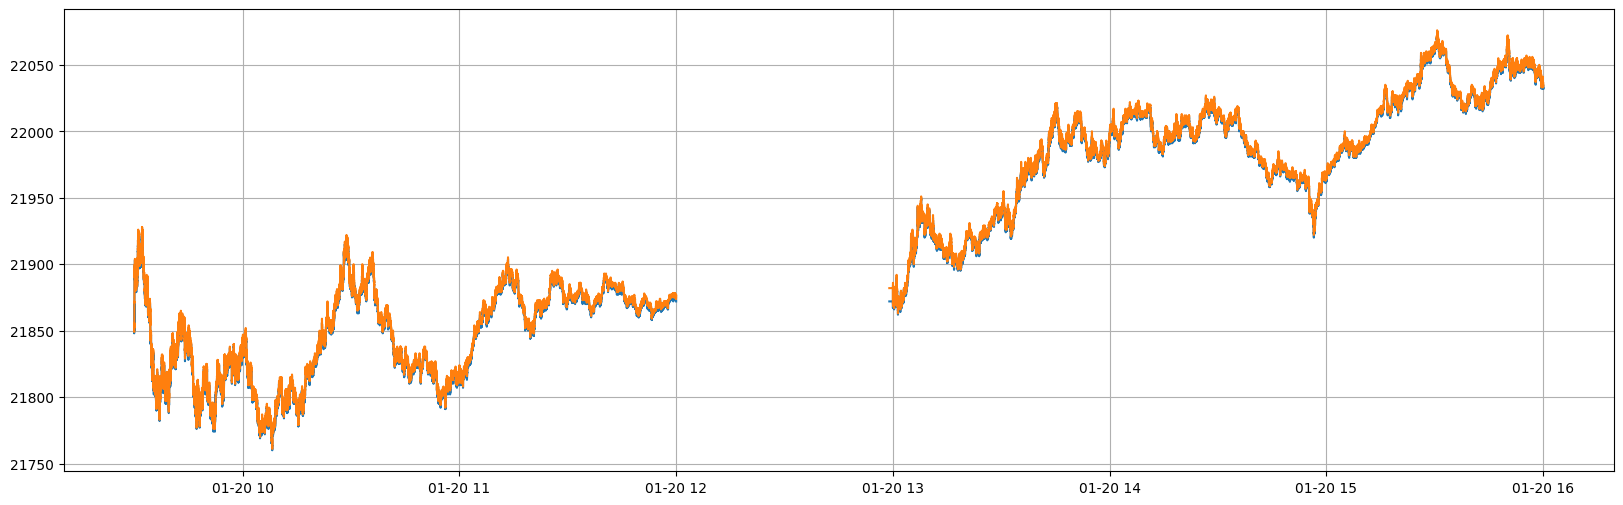

In [52]:
plt.figure(figsize=(20,6))
plt.plot(hsi_rs.index,hsi_rs['bids_0_price_'])
plt.plot(hsi_rs.index,hsi_rs['asks_0_price_'])
plt.grid(True)

In [53]:
iDisp.display(HTML("<H3>Quote - IMC PnL by Time of Day</H3>"))

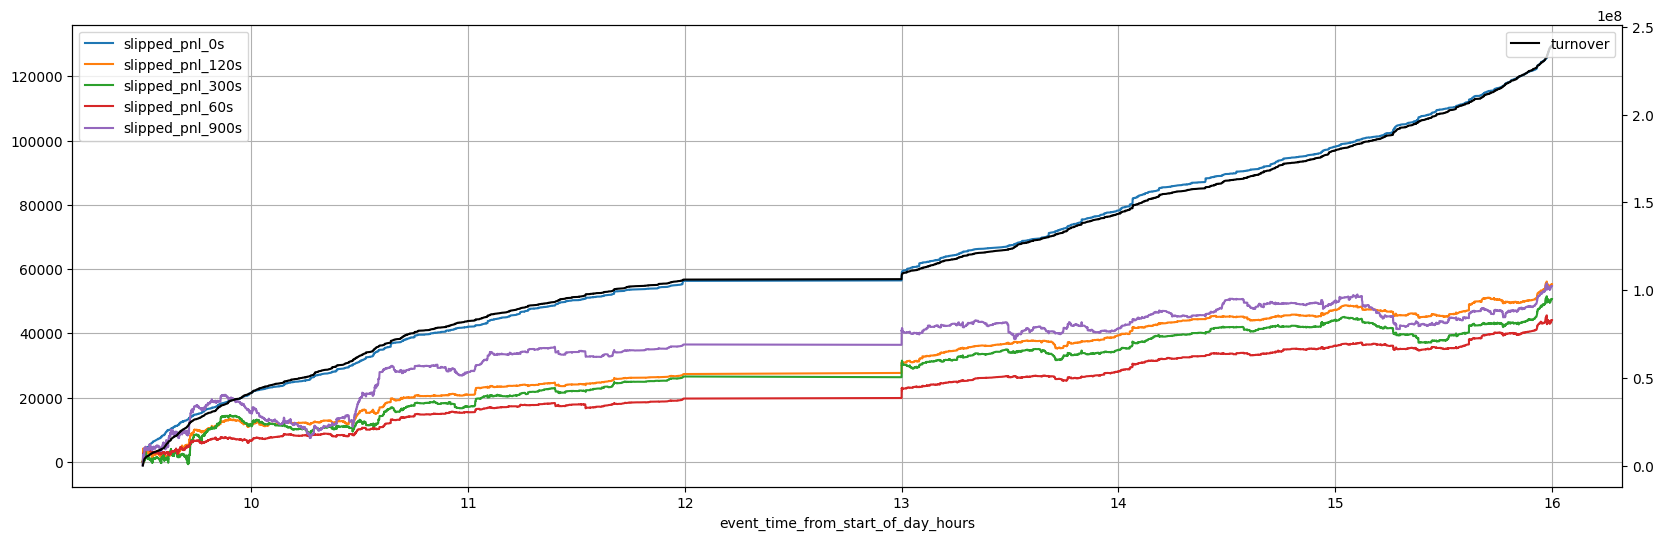

In [62]:
plot(trade_data, index='event_time_from_start_of_day_hours', values=['slipped_pnl_0s', 'slipped_pnl_60s', 'slipped_pnl_120s', 'slipped_pnl_300s', 'slipped_pnl_900s'], values_right='turnover', 
     filters=(lambda x: (x['competitor'] == 'IMC')))

In [ ]:
iDisp.display(HTML("<H3>Quote - IMC_BSK PnL by Time of Day</H3>"))

In [ ]:
plot(trade_data, index='event_time_from_start_of_day_hours', values=['slipped_pnl_0s', 'slipped_pnl_60s', 'slipped_pnl_120s', 'slipped_pnl_300s', 'slipped_pnl_900s'], values_right='turnover', 
     filters=(lambda x: (x['competitor'] == 'IMC_BSK')))

In [55]:
iDisp.display(HTML("<H3>Quote - ABN PnL by Time of Day</H3>"))

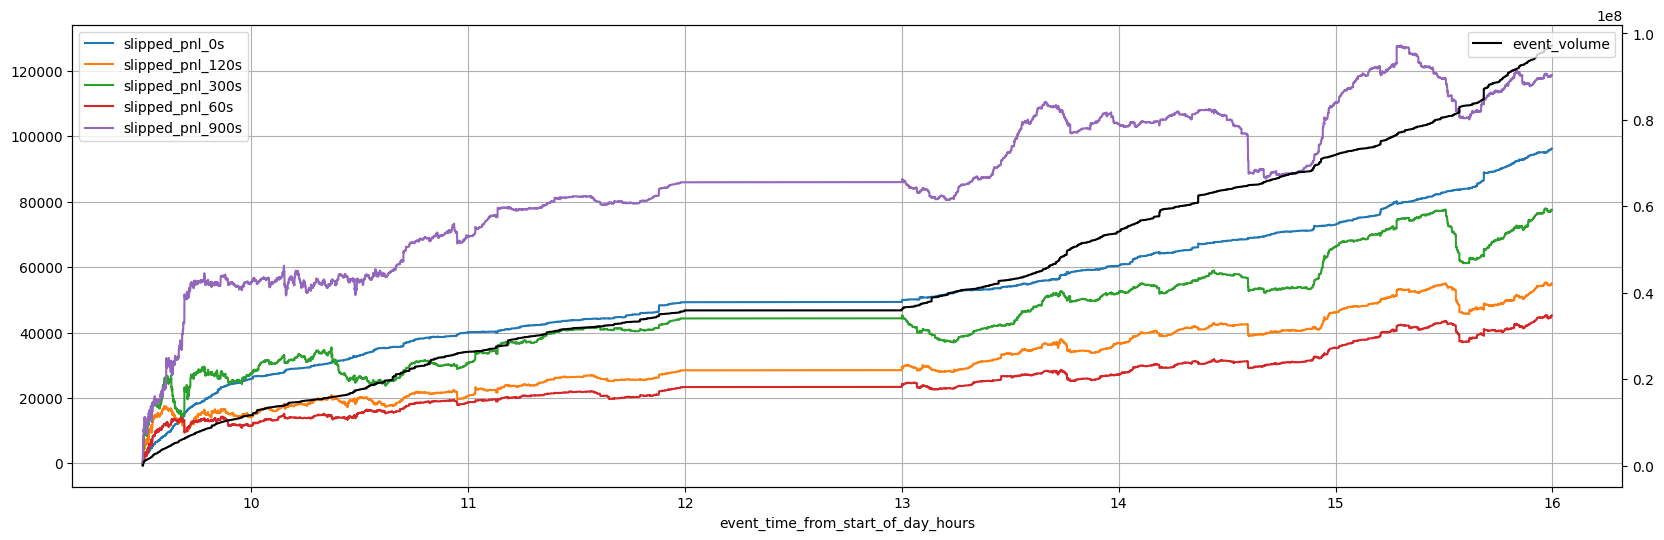

In [56]:
plot(trade_data, index='event_time_from_start_of_day_hours',values=['slipped_pnl_0s', 'slipped_pnl_60s', 'slipped_pnl_120s', 'slipped_pnl_300s', 'slipped_pnl_900s'], values_right='turnover',
     filters=(lambda x: (x['competitor'].isin(['ABN']))))

In [57]:
iDisp.display(HTML("<H3> ABN PNL for top 5 symbols by time of day</H3>"))

In [58]:
top_5_symbols = trade_data[lambda x: x.competitor=='ABN'].groupby('product_symbol').sum().sort_values('slipped_pnl_120s',ascending=False).head(5).index

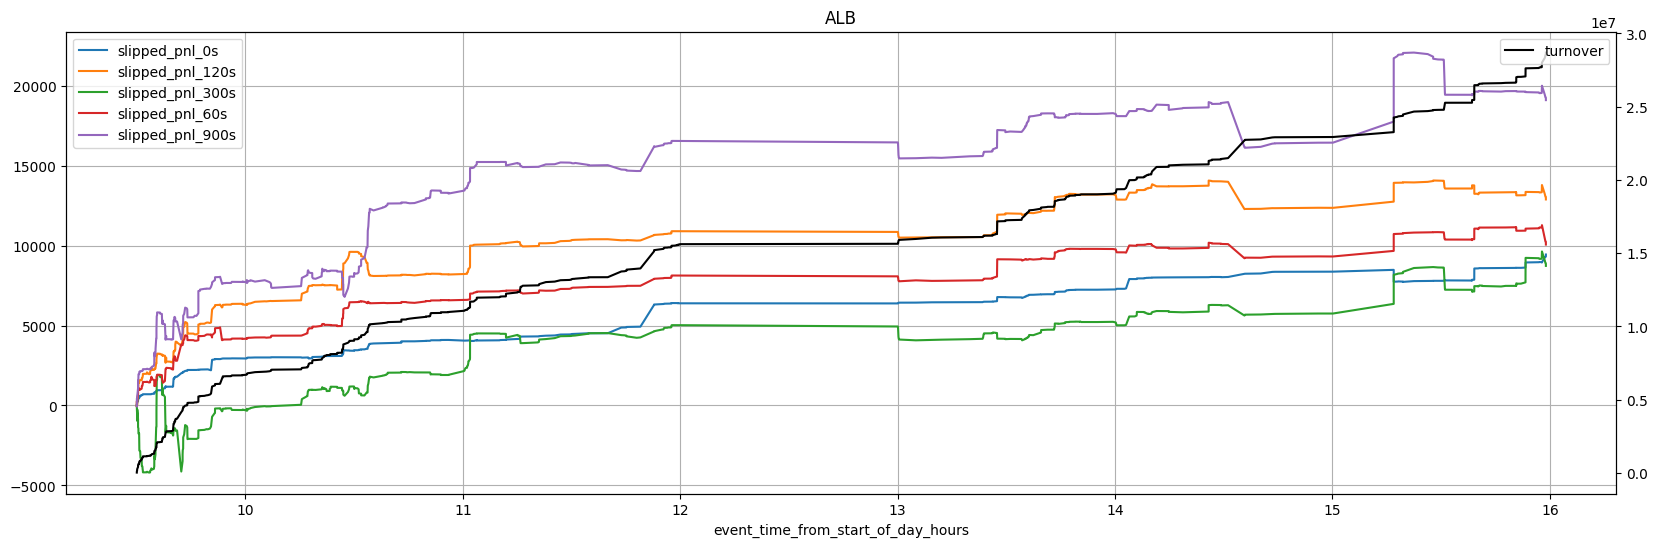

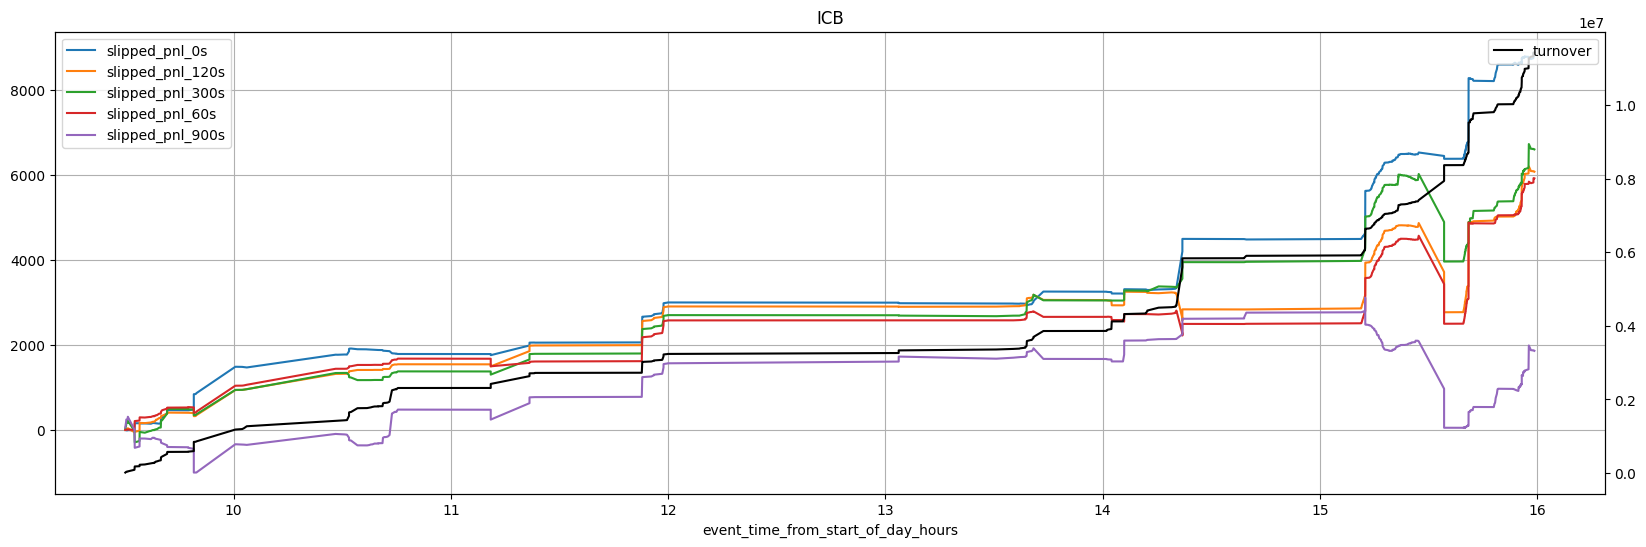

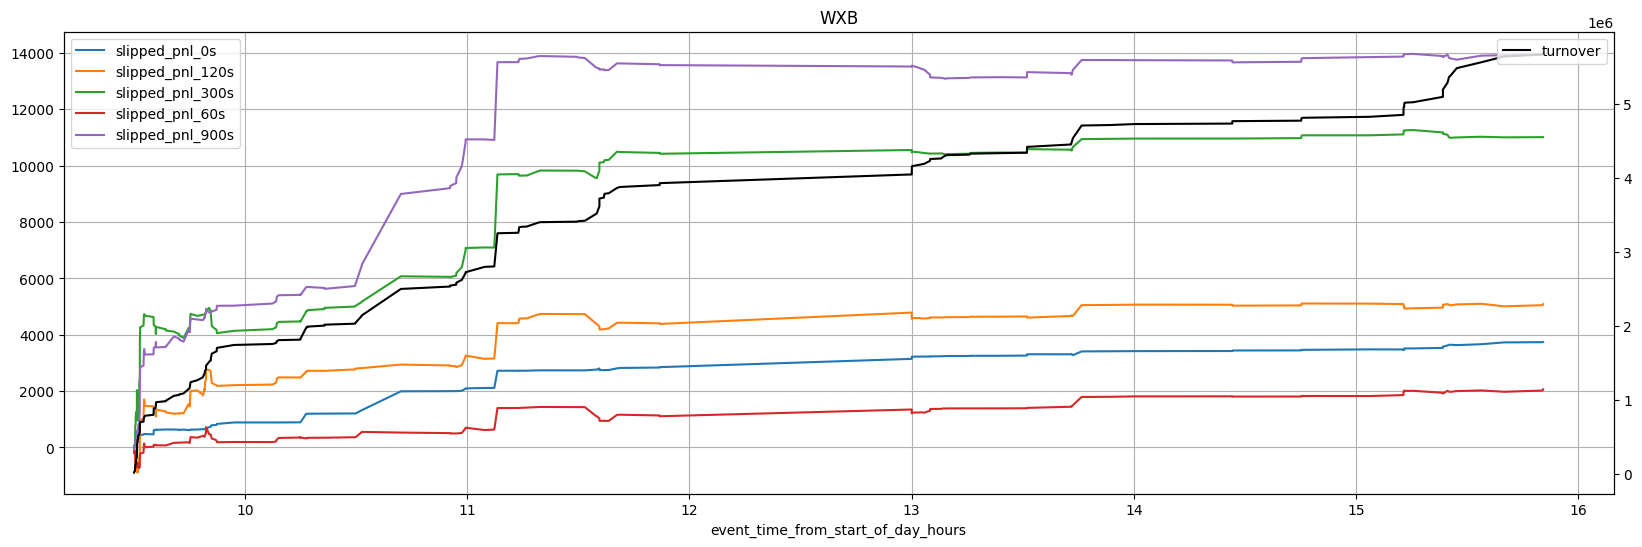

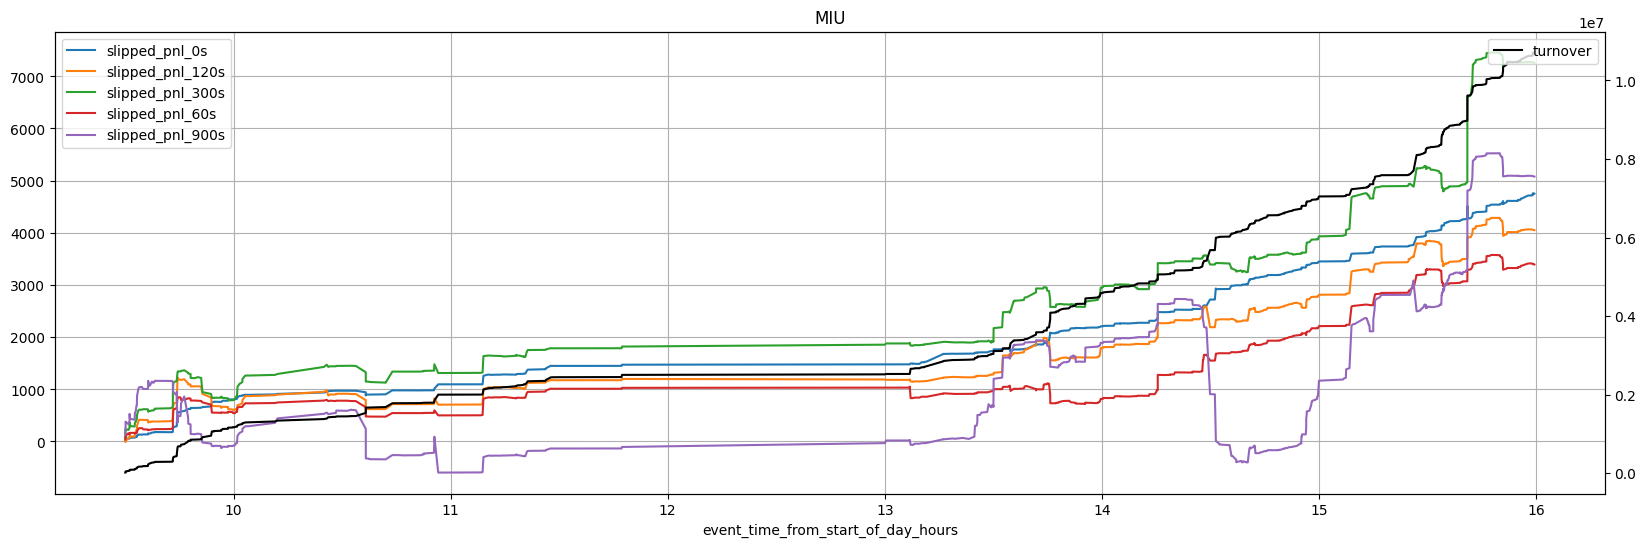

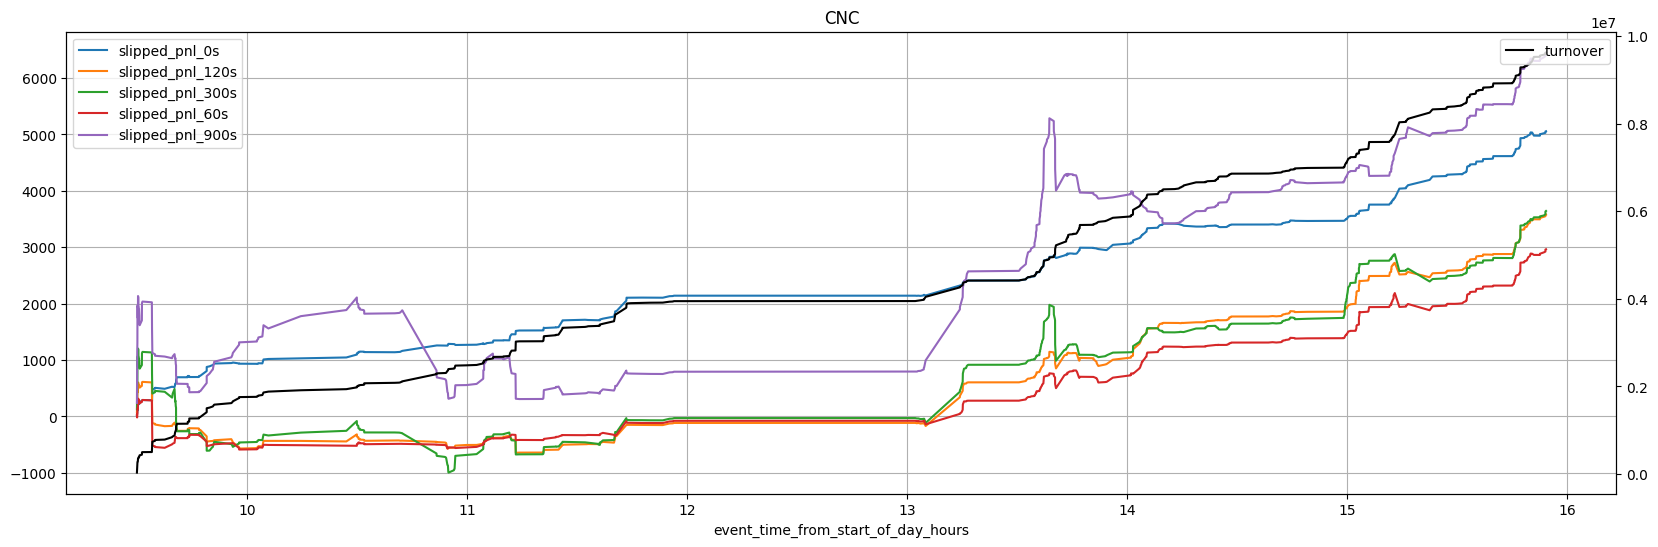

In [63]:
for symbol in top_5_symbols:
    plot(trade_data, index='event_time_from_start_of_day_hours',values=['slipped_pnl_0s', 'slipped_pnl_60s', 'slipped_pnl_120s', 'slipped_pnl_300s', 'slipped_pnl_900s'], values_right='turnover',
         filters=(lambda x: (x['competitor'].isin(['ABN']))&(x.product_symbol==symbol)),title=symbol)